In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from pathlib import Path

In [4]:
# Project root (go up one level if inside notebooks/)
PROJECT_ROOT = Path.cwd().resolve().parents[0] if (Path.cwd().name == 'notebooks') else Path.cwd()

In [5]:
# Paths for raw and processed data
RAW_PATH = PROJECT_ROOT / 'data' / 'raw' / 'Walmart_Sales.csv'
PROCESSED_PATH = PROJECT_ROOT / 'data' / 'processed' / 'Walmart_Sales_clean.csv'

In [6]:
RAW_PATH, PROCESSED_PATH

(WindowsPath('C:/Users/ASUS/Retail-Sales-Forecasting-Inventory-Optimization/data/raw/Walmart_Sales.csv'),
 WindowsPath('C:/Users/ASUS/Retail-Sales-Forecasting-Inventory-Optimization/data/processed/Walmart_Sales_clean.csv'))

In [7]:
#load the raww dataset
df = pd.read_csv(RAW_PATH)

In [8]:
df.shape, df.head()

((6435, 8),
    Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
 0      1  05-02-2010    1643690.90             0        42.31       2.572   
 1      1  12-02-2010    1641957.44             1        38.51       2.548   
 2      1  19-02-2010    1611968.17             0        39.93       2.514   
 3      1  26-02-2010    1409727.59             0        46.63       2.561   
 4      1  05-03-2010    1554806.68             0        46.50       2.625   
 
           CPI  Unemployment  
 0  211.096358         8.106  
 1  211.242170         8.106  
 2  211.289143         8.106  
 3  211.319643         8.106  
 4  211.350143         8.106  )

In [9]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [10]:
# Missing Values check
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [11]:
#summary statistics
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [12]:
# Convert Date to datetimme format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [13]:
#sort by Date just in case
df=df.sort_values('Date').reset_index(drop=True)

In [14]:
#check again
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,10,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765
2,37,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554
3,17,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548
4,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324


In [15]:
import matplotlib.pyplot as plt

In [16]:
# Aggregate weekly sales by date
sales_over_time = df.groupby('Date')['Weekly_Sales'].sum()

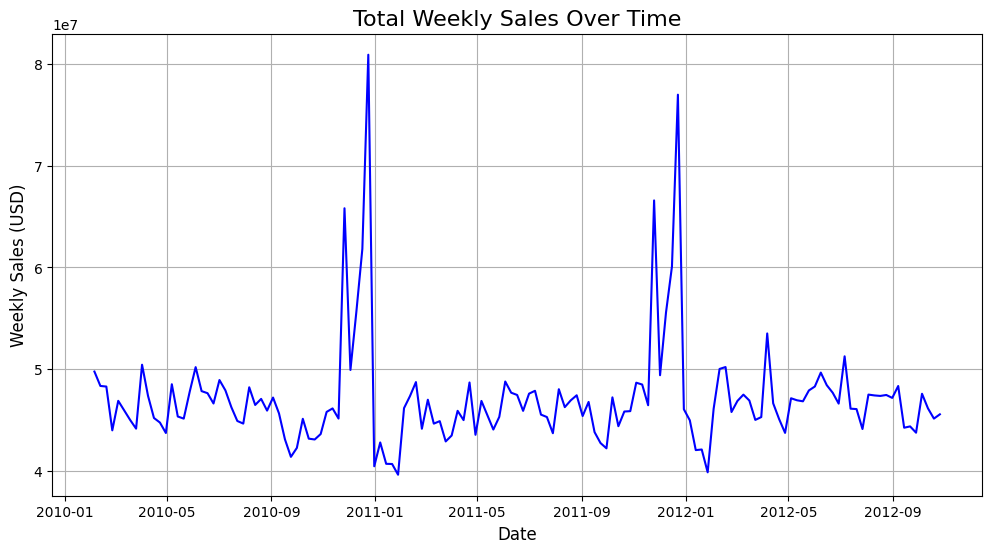

In [17]:
# Plot
plt.figure(figsize=(12,6))
plt.plot(sales_over_time.index, sales_over_time.values, color='blue')
plt.title('Total Weekly Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Sales (USD)', fontsize=12)
plt.grid(True)
plt.show()

In [18]:
# Extract time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsHoliday'] = df['Holiday_Flag'].map({0: 'No', 1: 'Yes'})

In [19]:
# Sort again just in case
df = df.sort_values(['Store', 'Date'])

In [20]:
# Rolling and lag features per store
df['Rolling_4w'] = df.groupby('Store')['Weekly_Sales'].transform(lambda x: x.rolling(4).mean())
df['Rolling_12w'] = df.groupby('Store')['Weekly_Sales'].transform(lambda x: x.rolling(12).mean())
df['Lag_1'] = df.groupby('Store')['Weekly_Sales'].shift(1)
df['Lag_4'] = df.groupby('Store')['Weekly_Sales'].shift(4)
df['Lag_12'] = df.groupby('Store')['Weekly_Sales'].shift(12)

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,DayOfWeek,IsHoliday,Rolling_4w,Rolling_12w,Lag_1,Lag_4,Lag_12
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,4,No,NaN,NaN,NaN,NaN,NaN
59,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,4,Yes,NaN,NaN,1643690.90,NaN,NaN
116,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,4,No,NaN,NaN,1641957.44,NaN,NaN
174,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,4,No,1576836.025,NaN,1611968.17,NaN,NaN
182,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,4,No,1554614.970,NaN,1409727.59,1643690.9,NaN


In [21]:
import os

In [22]:
os.makedirs("data/processed", exist_ok=True)

In [23]:
# Save processed dataset
processed_path = "data/processed/Walmart_Sales_Features.csv"
df.to_csv(processed_path, index=False)

processed_path

'data/processed/Walmart_Sales_Features.csv'

In [24]:
#END